### Simple Regression


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
#reference: http://www.statsmodels.org/


%matplotlib inline
plt.style.use('seaborn-white')

In [4]:
#download at http://www-bcf.usc.edu/~gareth/ISL/data.html
#read in data (change to what ever folder you use)

advertising = pd.read_csv('C:/Users/cutalnaf/Documents/109-1 Courses/Data Science/Week 10/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


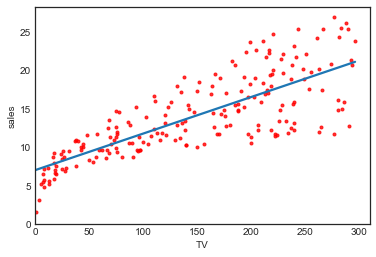

In [6]:
#we can display the regression line using seaborn
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(ymin=0);

There are multiple ways to do linear regression in Python. Above we have used to seaborn to just draw the regression line. We can also use Scikit-Learn or the statsmodels library. First we use the sklearn module. The intercept is $\beta_0$ and the coefficent is $\beta_1$


In [7]:
# Regression coefficients (Ordinary Least Squares)
lm = skl_lm.LinearRegression()

X = advertising.TV
X= np.array(X).reshape(-1,1)
Y = advertising.sales

lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)
#X

7.032593549127693
[0.04753664]


### Question: 
    1. What is the predictor and the response in the code above?

### Answer 1: 
The Predictor (X) = TV atribute

The Response (Y) = Sales

Y = 7.0326X + 0.0475

In [8]:
#use statsmodel for linear regression
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


### Question:
1. Perform the same simple regression on radio and newspaper (using statsmodels)
2. Explain the t-statistic significance

### Answer 1: 

1. Performing the simple regression on radio and newspaper

In [9]:
#use statsmodel for linear regression (Radio)
est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [10]:
#use statsmodel for linear regression (Newspaper)
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Answer 2:

2. Explain the t-statistic significance

For radio and newspaper : Reject  H0
We reject hipothesis null because the result value both of radio and newspaper are greater that confidence interval. 

### Multiple Regression

Perform multiple regression on TV, radio and newspaper, use:
```
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()
```
Also print the correlation:
```
advertising.corr()
```


### Question:
1. Which predictor(s) has significant association with sales? Which does not?
2. Did you have a different answer when performing individual simple regression on each predictor( radio, TV and newspaper separately). Explain the results.
3. What is th $R^2$ value for TV alone, and TV and radio (please read pg 79-80 ISLR book). Comment of the $R^2$ value obtained.



In [11]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        17:51:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Answer

1. Which predictor(s) has significant association with sales? Which does not?

TV and Radio give positif. T value dont show there's a relationship.
Newspaper gives negatif coeficient and t value give best realtionship.
So, the predictors that give significant association with sales are TV and Radio. Otherwise, the multiple regression to suggest no relationship
between sales and newspaper.

2. Did you have a different answer when performing individual simple regression on each predictor( radio, TV and newspaper separately). Explain the results.

Yes, from error (intercept) and coefficient. 
The two models provide different results by showing different error values and coefficients. 

Based on the result:

Seperate 3 predictor: Coefficients of the simple linear regression model for number of units sold on Top:
radio advertising budget and Bottom: newspaper advertising budget. A 1,000 increase in spending on radio advertising is associated with an average increase in sales by around 203 units, while the same increase in spending on newspaper advertising is associated with an average increase in sales by around 55 units (Note that the sales variable is in thousands of units, and the radio and newspaper
variables are in thousands of dollars).

Multiple Regression:
In contrast, in the multiple regression setting, the coefficient for newspaper represents the
average effect of increasing newspaper spending by $1,000 while holding TV and radio fixed.


3. What is th  𝑅2  value for TV alone, and TV and radio (please read pg 79-80 ISLR book). Comment of the  𝑅2  value obtained.

R2 is the square of the correlation of the response and the variable. In multiple linear regression, it turns out that it equals Cor(Y, Yˆ )2, the square of the correlation between the response and the fitted linear model; in fact one property of the fitted linear model is that it maximizes this correlation among all possible linear models. 
R2 will always increase when more variables. 

R2 for TVxRadio : 0.89719 vs R2 for TV alone : 0.612


This proof the statement that using more variables can increase the R2 value. 


### Extensions to Linear Model -Interaction Model

The standard linear model makes two important assumptions. They state that the relationship between the predictors and response are additive and linear. The additive assumption means that the effect of changes in a predictor $X_j$ on the response Y is independent of the values of the other predictors. The linear assumption states that the change in the response Y due to a one-unit change in $X_j$ is constant, regardless of the value of $X_j$. 

We may need to consider interaction effect between predictors, that is, predictors are not independent but depend on each other. For example, given a fixed budget of \$100,000, spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio. 

In the standard linear model, an increase in $X_1$ will increase by an average of $\beta_1$ units. Notice that the presence of $X_2$ does not alter this statement—that is, regardless of the value of $X_2$, a one-unit increase in $X_1$ will lead to a $\beta_1$-unit increase in Y.

$$ Y=\beta_0+\beta_1X_1+\beta_2X_2 + \epsilon $$


One way of extending this model to allow for interaction effects is to include a third predictor, called an interaction term, which is constructed by computing the product of $X_1$ and $X_2$. This results in the model:


$$ Y=\beta_0+\beta_1X_1+\beta_2 X_2+\beta_3 X_1 X_2+\epsilon $$
   


We test this using the following code (fill in with actual variables):

```
est = smf.ols('Response ~ X1 + X2 + X1*X2', advertising).fit()
est.summary().tables[1]
```

### Questions:
1. Obtain the linear model with TV, radio and interaction term TV*radio. Which predictors are significant? Which predictors should be used in the model? What is the $R^2$ value?

In [21]:
est = smf.ols('sales ~ TV + radio  + TV*radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


### Answer 
Which predictors are significant? \
The results above strongly suggest that the model that includes the
interaction term is superior to the model that contains only main effects.
The p-values associated with TV, radio, and the interaction term all are statistically significant. 

Which predictors should be used in the model? What is the  𝑅2  value? \
From table shows so it is obvious
that all three variables should be included in the model. However, it is
sometimes the case that an interaction term has a very small p-value, but
the associated main effects (in this case, TV and radio) do not. \

The R2 for the proposed model (TVxRadio) is 96.8 %,
compared to only 89.7 % for the model that predicts sales using TV and
radio without an interaction term.

### Non-linear data : Polynomial Regression

Read in the auto.csv file included in the zipped download.

Plot out the data using (1) linear line (2) polynomial degree 2 (3) polynomail degree 5

Which line fits best? There is a pronounced relationship between mpg and horsepower, but it seems clear that this relationship is in fact non-linear: the data suggest a curved relationship. 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


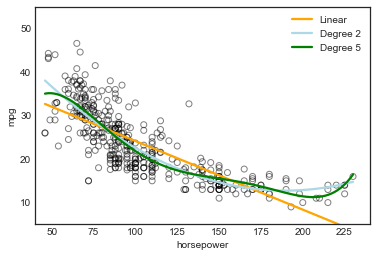

In [23]:
auto = pd.read_csv('C:/Users/cutalnaf/Documents/109-1 Courses/Data Science/Week 10/Auto.csv', na_values='?').dropna() #drop NA values
auto.info()
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

The linear regression model assumes a linear relationship between the response and predictors. But in some cases, the true relationship between the response and the predictors may be nonlinear. We can directly extend the linear model to accommodate non-linear relationships by using polynomial regression.

We can transform the model (which still remains a linear model in X): 

$$  mpg=\beta_0+\beta_1 \times horsepower + \beta_2 \times horsepower^2 $$

We can still use standard linear regression software to estimate $\beta_0$, $\beta_1$, and $\beta_2$ in order to produce a non-linear fit.

To do so make another column to store the $horsepower^2$ values (quadratic):
```
auto['horsepower2'] = auto.horsepower**2
auto.head(3)
```
Then run the statsmodels ols module as before to compare the linear and quadratic fit.

### Question:
1. Which model is better linear or quadratic (or higher degree)? How do you make the judgement?


In [24]:
auto['horsepower2'] = auto.horsepower**2
auto['horsepower5'] = auto.horsepower**5

auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,horsepower5
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0,3.712930e+10
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0,1.222981e+11
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0,7.593750e+10


In [25]:
est = smf.ols('horsepower2 ~ mpg + cylinders  + displacement + horsepower + weight + acceleration + year + origin', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            horsepower2   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2751.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:38:08   Log-Likelihood:                -3361.4
No. Observations:                 392   AIC:                             6741.
Df Residuals:                     383   BIC:                             6777.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -1.52e+04   1842.073     -8.249      0.000   -1.88e+04   -1.16e+04
mpg            187.9159     19.888      9.449      0.000     148.813     227.019
cylinders     -744.5539    126.370     -5.892      0.000    -993.021    -496.087
displacement    23.5583      2.955      7.971      0.000      17.747      29.369
horsepower     303.8962      5.384     56.449      0.000     293.311     314.481
weight          -1.9672      0.285     -6.906      0.000      -2.527      -1.407
acceleration   393.5840     38.555     10.208      0.000     317.778     469.390
year          -125.7427     24.851     -5.060      0.000    -174.604     -76.882
origin         141.2814    112.044      1.261      0.208     -79.017     361.579
==============================================================================
Omnibus:                       41.348   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.617
Skew:                           0.706   Prob(JB):                     4.17e-14
Kurtosis:                       4.334   Cond. No.                     8.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
est = smf.ols('mpg ~ horsepower + horsepower2 + horsepower5', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     285.8
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           7.37e-98
Time:                        18:38:10   Log-Likelihood:                -1132.6
No. Observations:                 392   AIC:                             2273.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      59.7510      3.280     18.215      0.000      53.302      66.200
horsepower     -0.5315      0.070     -7.580      0.000      -0.669      -0.394
horsepower2     0.0016      0.000      4.297      0.000       0.001       0.002
horsepower5 -1.326e-11   1.28e-11     -1.040      0.299   -3.83e-11    1.18e-11
==============================================================================
Omnibus:                       17.108   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.860
Skew:                           0.206   Prob(JB):                     2.69e-08
Kurtosis:                       4.402   Cond. No.                     1.49e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Answer 
Which model is better linear or quadratic (or higher degree)? \
The blue curve
in the plot shows the resulting quadratic fit to the data. The quadratic
fit appears to be substantially better than the fit obtained when just the
linear term is included. Why not include higher degree? The green curve in the plot displays the fit that results from including all polynomials up
to fifth degree in the model. The resulting fit seems unnecessarily
wiggly—that is, it is unclear that including the additional terms really has
led to a better fit to the data.

How do you make the judgement?\
The R2 of the quadratic fit is 0.688, compared to
0.606 for the linear fit, and the p-value in Table 3.10 for the quadratic term
is highly significant. The approach that we have just described for extending the linear model
to accommodate non-linear relationships is known as polynomial regression, since we have included polynomial functions of the predictors in the
regression model
